# Introduction


#### Dataset

dataset berisi Perputaran Pelanggan Telekomunikasi dimana setiap baris mewakili pelanggan, setiap kolom berisi atribut pelanggan yang dijelaskan pada kolom Metadata.

#### Sumber Data

data asli berasal dari kaggle : https://www.kaggle.com/blastchar/telco-customer-churn

#### Objective

membuat model klasifikasi untuk melihat apakah Pelanggan yang pergi atau tidak

#### Information

*   Customers who left within the last month – the column is called Churn
*  Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
*  Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
*  Demographic info about customers – gender, age range, and if they have partners and dependents

# Import Pustaka

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout

# for preprocessing
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler

# for feature selection
from sklearn.ensemble import RandomForestClassifier

# for evaluation
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

# for Hyperparameter tunning
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data Loading

In [2]:
data = pd.read_csv('/content/drive/MyDrive/data_milestone/Telco-Customer-Churn.csv')

#### melihat data teratas

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### melihat data terbawah

In [4]:
data.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


#### melihat informasi data

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#### melihat statistika data

In [6]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


#### melihat ukuran data

In [7]:
data.shape

(7043, 21)

data terdiri atas 7043 rows dan 21 columns 

# Data Cleaning

#### melihat missing values

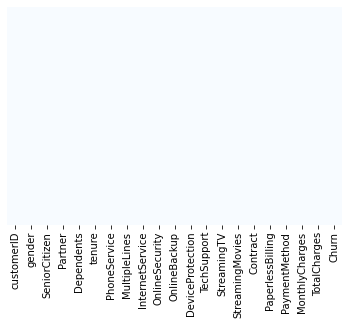

In [8]:
sns.heatmap(data.isnull(), yticklabels = False, cbar = False, cmap="Blues");

In [9]:
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

tidak ada missing values dalam data

#### mengubah feature TotalCharges menjadi datatypes float

In [10]:
data['TotalCharges'] = data['TotalCharges'].replace(" ", 0).astype('float64')

#### melihat informasi data

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Explorasi Data Analysis

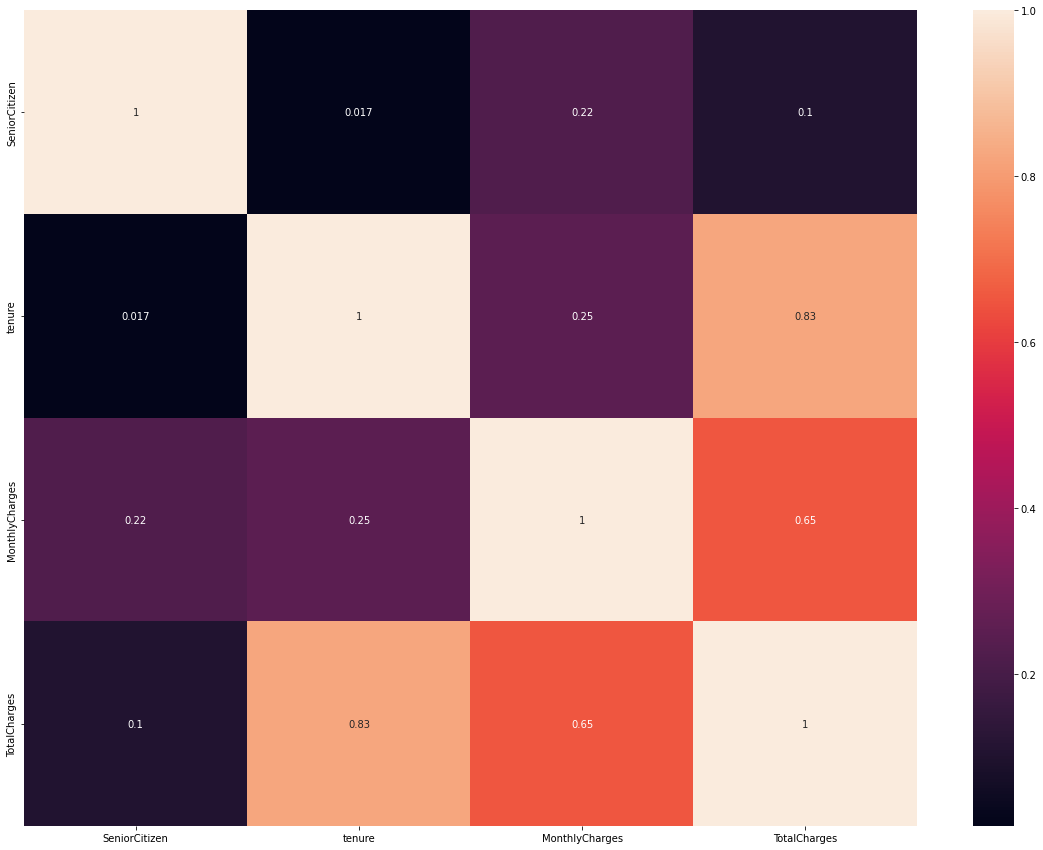

In [12]:
corr = data.corr()
f, ax = plt.subplots(figsize = (20, 15))
sns.heatmap(corr, annot = True);

dari visualisasi telihat bahwa feature 'tenure' dan feature 'TotalCharges' memiliki korelasi yang tinggi

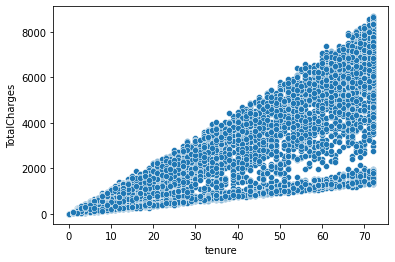

In [13]:
sns.scatterplot(x='tenure',y='TotalCharges',data=data)

### Visualisasi Churn Features

In [14]:
not_churn = data[data['Churn'] == 'No']
churn = data[data['Churn'] == 'Yes']

print("Total Pelanggan  =", len(data))
print("Total Pelanggan yang beralih = ", len(churn))
print("Total Pelanggan tidak beralih =", len(not_churn))

Total Pelanggan  = 7043
Total Pelanggan yang beralih =  1869
Total Pelanggan tidak beralih = 5174


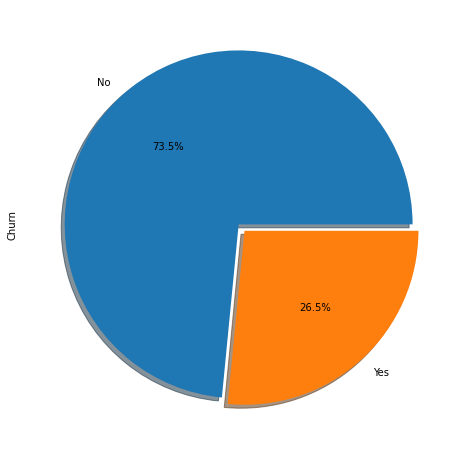

In [15]:
plt.figure(figsize=(8,8))
data['Churn'].value_counts().plot.pie(explode=[0,0.05], autopct='%1.1f%%', shadow=True);

Dari Visualisasi terlihat bahwa pelanggan telekomunikasi yang beralih sebesar 26.5% dan yang tidak beralih 73.5%

### Numerical Features

In [16]:
Numerical_features = [feature for feature in data.columns if data[feature].dtypes!='O']

print("Jumlah Numerical Features {}".format(len(Numerical_features)))

Jumlah Numerical Features 4


#### Discrete Features

In [17]:
discrete_features =[feature for feature in Numerical_features if data[feature].nunique()<10 ]

print("Discrete Features Count: {}".format(len(discrete_features)))
print("Discrete Features : ", discrete_features )

Discrete Features Count: 1
Discrete Features :  ['SeniorCitizen']


#### Continous Features

In [18]:
continous_features =[feature for feature in Numerical_features if feature not in discrete_features ]

print("Continous Features Count: {}".format(len(continous_features)))
print("Continous Features : ", continous_features )

Continous Features Count: 3
Continous Features :  ['tenure', 'MonthlyCharges', 'TotalCharges']


### Visualisasi Hubungan Feature SeniorCitizen dan feature Churn

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


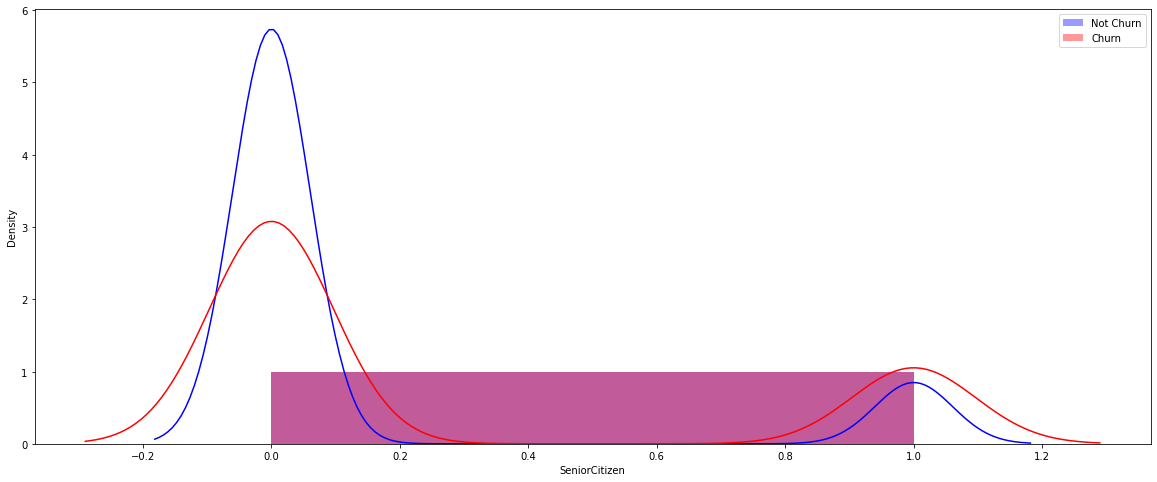

In [19]:
plt.figure(figsize=(20,8))
sns.distplot(data['SeniorCitizen'][data['Churn'] == "No"], bins=[0,1], color='b', label='Not Churn')
sns.distplot(data['SeniorCitizen'][data['Churn'] == "Yes"], bins=[0,1], color='r', label='Churn')
plt.legend();

Dari visualisasi terlihat bahwa pelanggan dengan Senior Citizen cenderung tidak beralih

# Visualisasi Hubungan Feature Tenure dan feature Churn

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


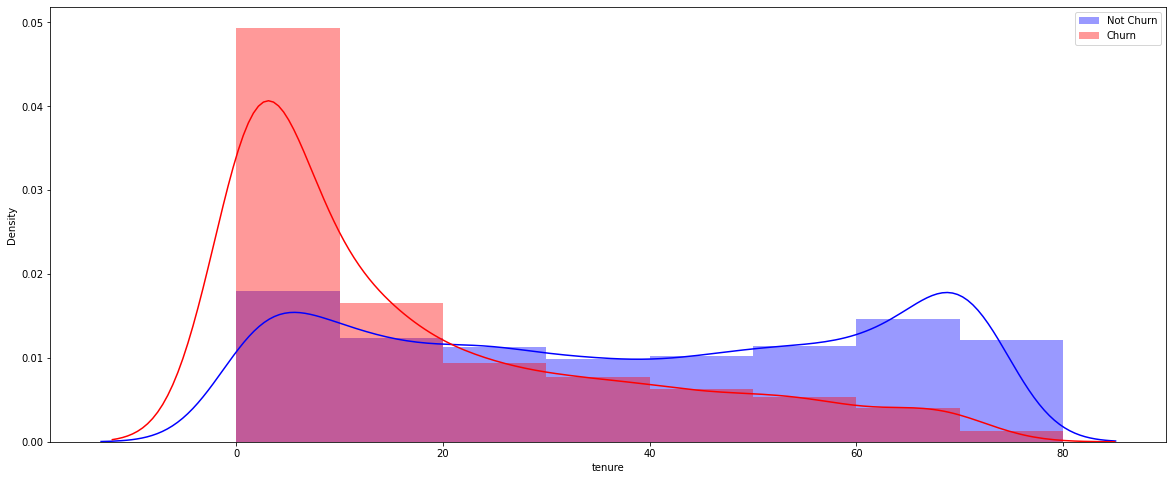

In [20]:
plt.figure(figsize=(20,8))
sns.distplot(data['tenure'][data['Churn'] == "No"], bins=[0,10,20,30,40,50,60,70,80], color='b', label='Not Churn')
sns.distplot(data['tenure'][data['Churn'] == "Yes"], bins=[0,10,20,30,40,50,60,70,80], color='r', label='Churn')
plt.legend();

Dari Visualisasi telihat bahwa pelanggan yang beralih adalah pelanggan yang telah berlangganan dalam rentang waktu 0 sampai 20 bulan

# Visualisasi Hubungan feature MonthlyCharges  dan feature Churn

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


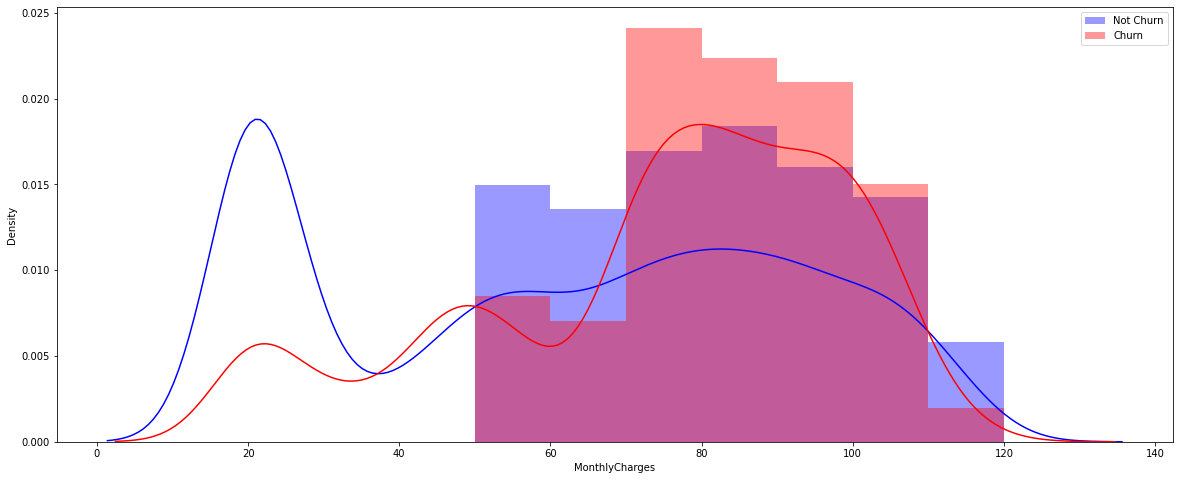

In [21]:
plt.figure(figsize=(20,8))
sns.distplot(data['MonthlyCharges'][data['Churn'] == "No"], bins=[50,60,70,80,90,100,110,120], color='b', label='Not Churn')
sns.distplot(data['MonthlyCharges'][data['Churn'] == "Yes"], bins=[50,60,70,80,90,100,110,120], color='r', label='Churn')
plt.legend();

Dari Visualisasi telihat bahwa pelanggan yang beralih adalah pelanggan memiliki rentang tagihan pembayaran perbulan antara 70 sampai dengan 110

# Visualisasi Hubungan feature TotalCharges  dan feature Churn

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


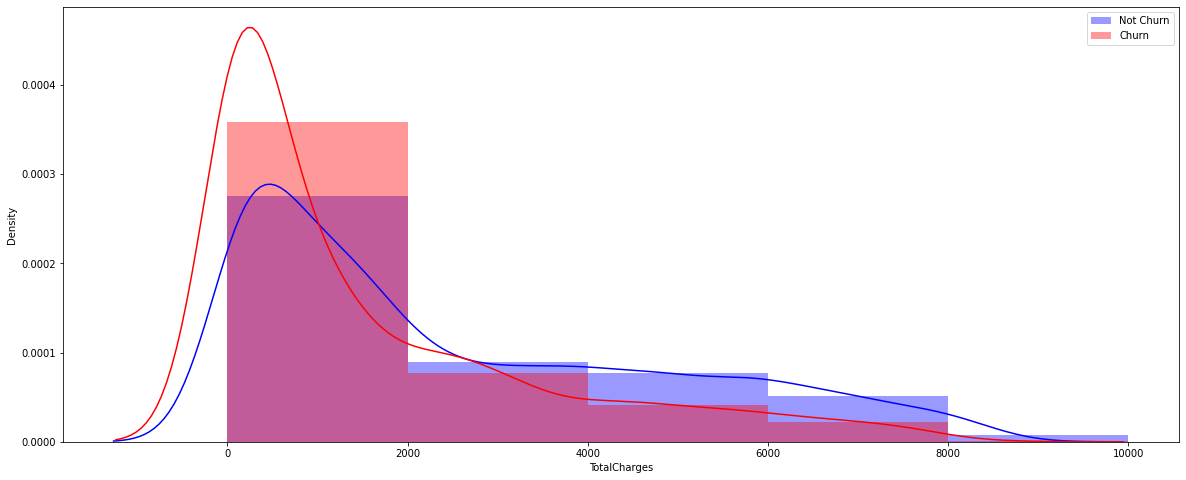

In [22]:
plt.figure(figsize=(20,8))
sns.distplot(data['TotalCharges'][data['Churn'] == "No"], bins=[0,2000,4000,6000,8000,10000], color='b', label='Not Churn')
sns.distplot(data['TotalCharges'][data['Churn'] == "Yes"], bins=[0,2000,4000,6000,8000,10000], color='r', label='Churn')
plt.legend();

Dari visualisasi terlihat bahwa pelanggan yang beralih adalah yang memiliki beban total tagihan dalam rentang 0 sampai 2000 

### Categorical Features

In [23]:
categorical_features = [feature for feature in data.columns if data[feature].dtypes=='O']

print("Categorical feature count {}".format(len(categorical_features)))
print("Categorical feature = ",categorical_features)

Categorical feature count 17
Categorical feature =  ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


### Visualisasi Hubungan feature gender dan feature Churn

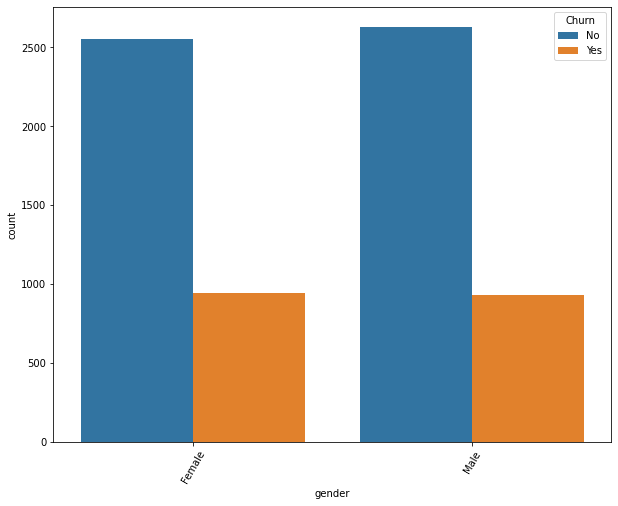

In [24]:
plt.figure(figsize=[10, 8])
sns.countplot(x = 'gender', hue = 'Churn', data = data);
plt.xticks(rotation = 60);

Dari visualisasi terlihat bahwa gender pria dan wanita memiliki jumlah yang sama menjadi pelanggan yang beralih

# Visualisasi Hubungan feature Partner dan feature Churn

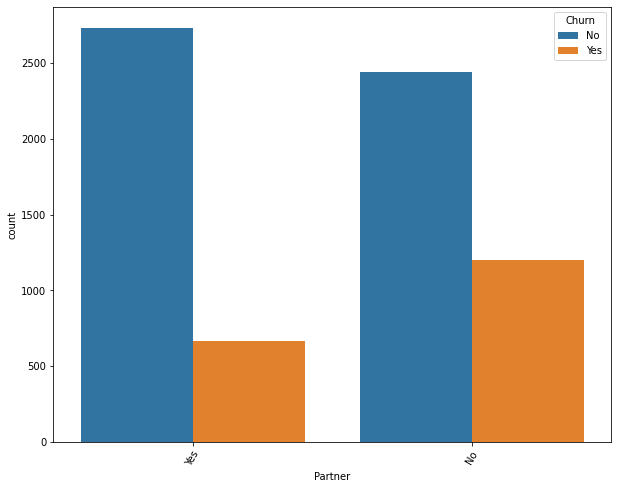

In [25]:
plt.figure(figsize=[10, 8])
sns.countplot(x = 'Partner', hue = 'Churn', data = data);
plt.xticks(rotation = 60);

Dari visualisasi terlihat bahwa pelanggan yang beralih adalah didominasi oleh pelanggan yang belum memiliki partners

# Visualisasi Hubungan feature Dependents dan feature Churn

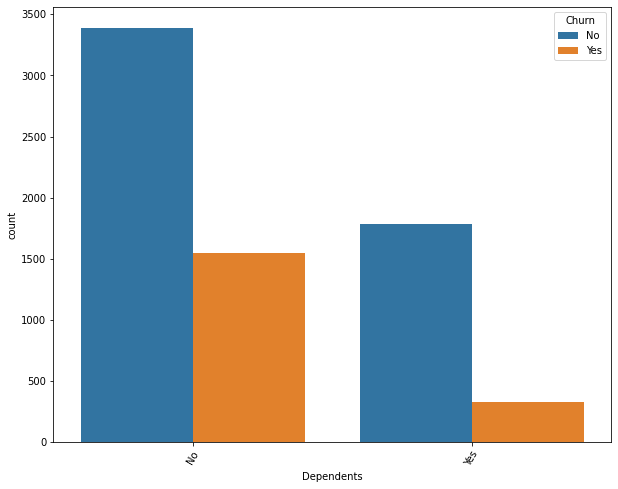

In [26]:
plt.figure(figsize=[10, 8])
sns.countplot(x = 'Dependents', hue = 'Churn', data = data);
plt.xticks(rotation = 60);

Dari visualisasi terlihat bahwa pelanggan yang beralih didominasi oleh pelanggan yang belum memiliki tanggungan (dependents)

### Visualisasi Hubungan feature PhoneService dan feature Churn

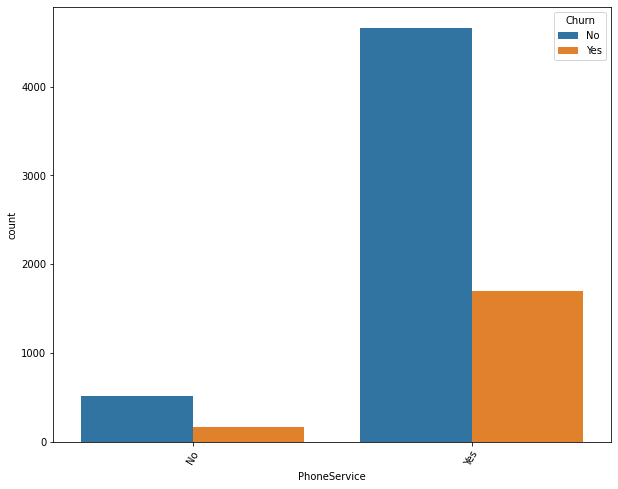

In [27]:
plt.figure(figsize=[10, 8])
sns.countplot(x = 'PhoneService' , hue = 'Churn', data = data);
plt.xticks(rotation = 60);

Dari visualisasi terlihat bahwa pelanggan yang beralih didominasi oleh pelanggan yang telah memiliki layanan telephone

### Visualisasi Hubungan feature MultipleLines dan feature Churn

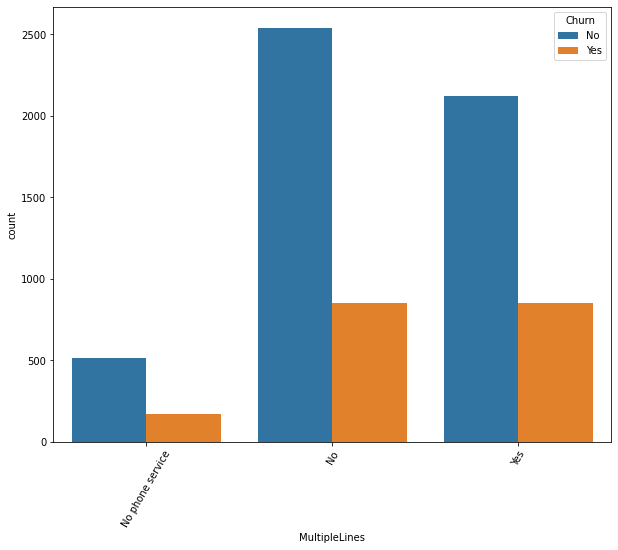

In [28]:
plt.figure(figsize=[10, 8])
sns.countplot(x = 'MultipleLines' , hue = 'Churn', data = data);
plt.xticks(rotation = 60);

Dari visualisasi terlihat bahwa pelanggan yang beralih memiliki persentase yang sama banyak antara pelanggan yang miliki lines telepone banyak dan tidak memiliki line telephone banyak 

### Visualisasi Hubungan feature InternetService dan feature Churn

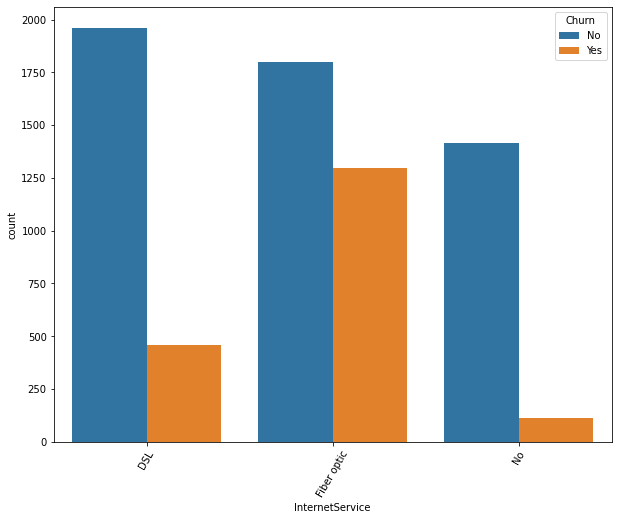

In [29]:
plt.figure(figsize=[10, 8])
sns.countplot(x = 'InternetService' , hue = 'Churn', data = data);
plt.xticks(rotation = 60);

Dari visualisasi terlihat bahwa pelanggan yang beralih didominasi oleh pelanggan yang memliki layanan internet service fiber optic

### Visualisasi Hubungan feature OnlineSecurity dan feature Churn

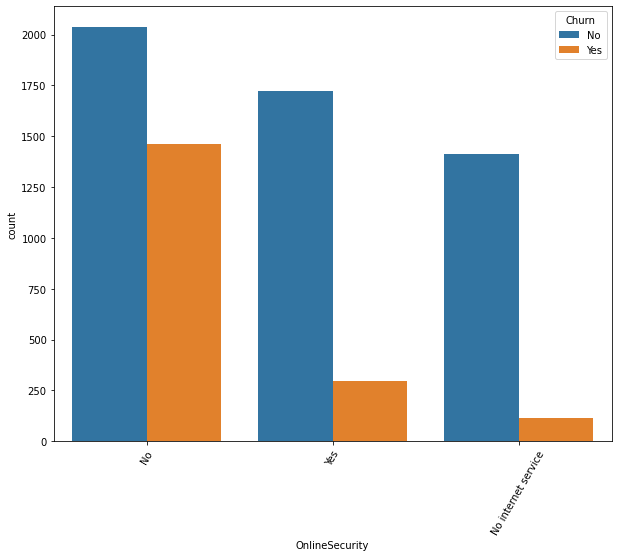

In [30]:
plt.figure(figsize=[10, 8])
sns.countplot(x = 'OnlineSecurity' , hue = 'Churn', data = data);
plt.xticks(rotation = 60);

Dari visualisasi terlihat bahwa pelanggan yang beralih didominasi oleh pelanggan yang tidak memiliki online security

### Visualisasi Hubungan feature OnlineBackup dan feature Churn

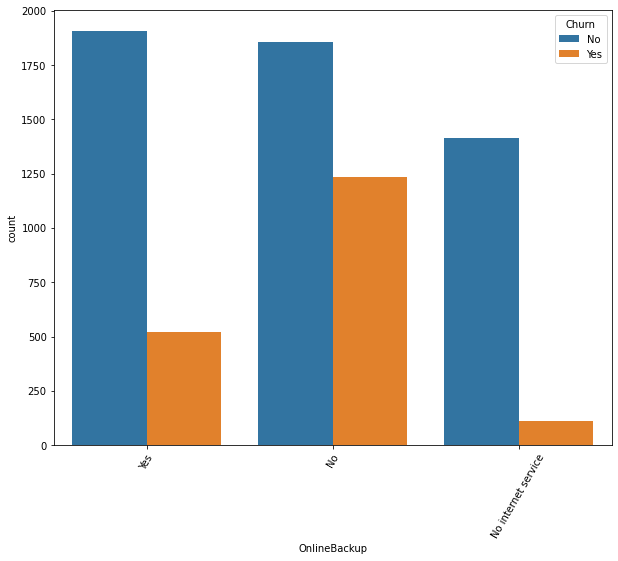

In [31]:
plt.figure(figsize=[10, 8])
sns.countplot(x = 'OnlineBackup' , hue = 'Churn', data = data);
plt.xticks(rotation = 60);

Dari visualisasi terlihat bahwa pelanggan yang beralih didominasi oleh pelanggan yang tidak memiliki online backup

### Visualisasi Hubungan feature DeviceProtection dan feature Churn

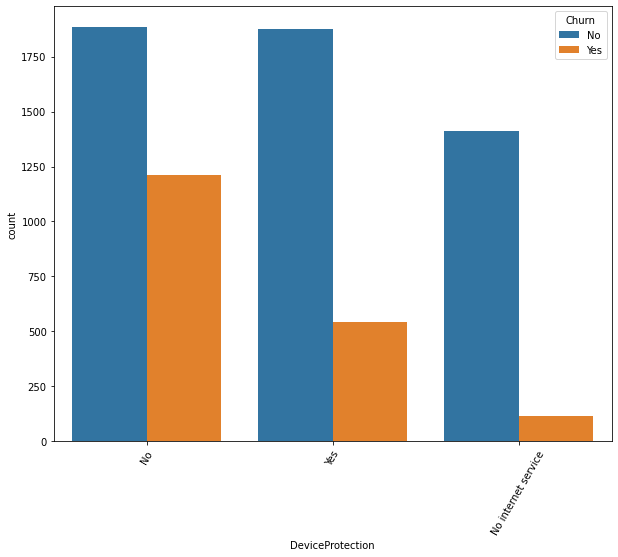

In [32]:
plt.figure(figsize=[10, 8])
sns.countplot(x = 'DeviceProtection' , hue = 'Churn', data = data);
plt.xticks(rotation = 60);

Dari visualisasi terlihat bahwa pelanggan yang beralih didominasi oleh pelanggan yang tidak memiliki device protection

### Visualisasi Hubungan feature TechSupport dan feature Churn

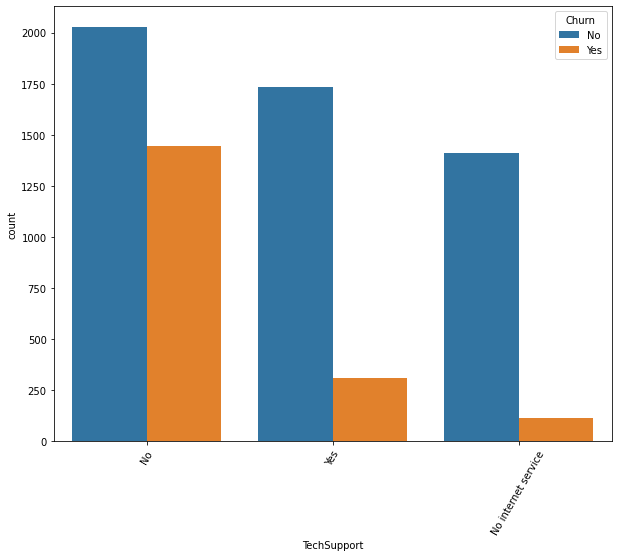

In [33]:
plt.figure(figsize=[10, 8])
sns.countplot(x = 'TechSupport' , hue = 'Churn', data = data);
plt.xticks(rotation = 60);

Dari visualisasi terlihat bahwa pelanggan yang beralih didominasi oleh pelanggan yang tidak mendapatkan TechSupport

### Visualisasi Hubungan feature StreamingTV dan feature Churn

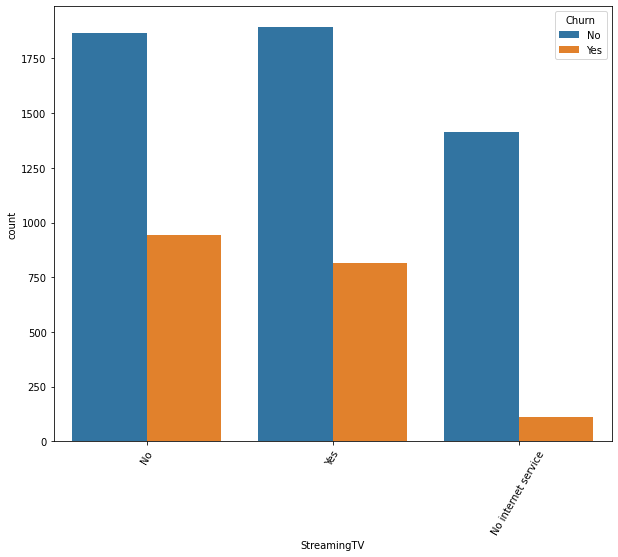

In [34]:
plt.figure(figsize=[10, 8])
sns.countplot(x = 'StreamingTV' , hue = 'Churn', data = data);
plt.xticks(rotation = 60);

Dari visualisasi terlihat bahwa pelanggan yang beralih didominasi oleh pelanggan yang tidak memiliki layanan StreamingTV

### Visualisasi Hubungan feature StreamingMovies dan feature Churn

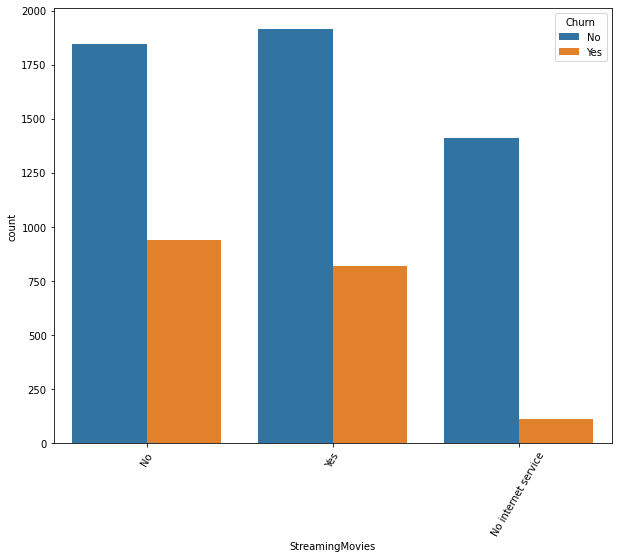

In [35]:
plt.figure(figsize=[10, 8])
sns.countplot(x = 'StreamingMovies' , hue = 'Churn', data = data);
plt.xticks(rotation = 60);

Dari visualisasi terlihat bahwa pelanggan yang beralih didominasi oleh pelanggan yang tidak memiliki layanan StreamingMovies

### Visualisasi Hubungan feature Contract dan feature Churn

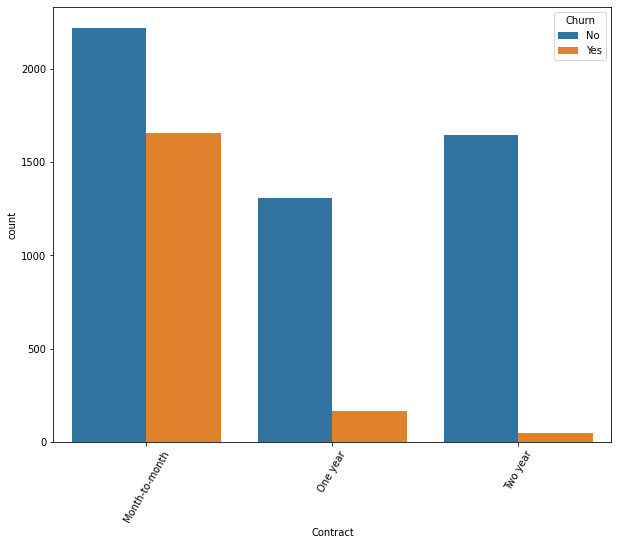

In [36]:
plt.figure(figsize=[10, 8])
sns.countplot(x = 'Contract' , hue = 'Churn', data = data);
plt.xticks(rotation = 60);

Dari visualisasi terlihat bahwa pelanggan yang beralih didominasi oleh pelanggan yang memiliki contract month to month

# Visualisasi Hubungan feature PaperlessBilling dan feature Churn

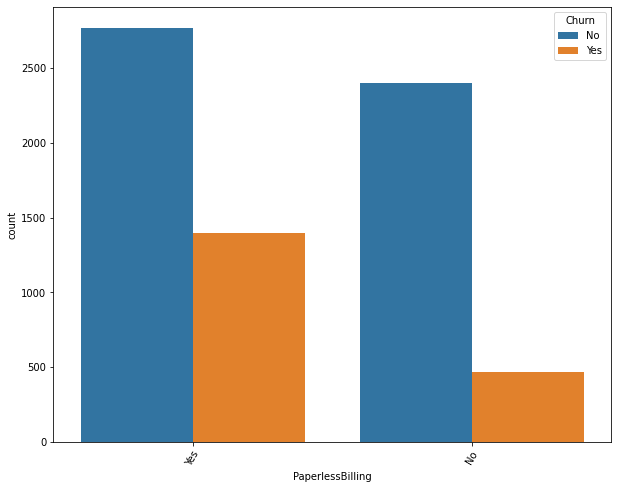

In [37]:
plt.figure(figsize=[10, 8])
sns.countplot(x = 'PaperlessBilling' , hue = 'Churn', data = data);
plt.xticks(rotation = 60);

Dari visualisasi terlihat bahwa pelanggan yang beralih didominasi oleh pelanggan yang mendapatkan tagihan berupa tanpa kertas (Paperless Billing)

### Visualisasi Hubungan feature PaymentMethod dan feature Churn

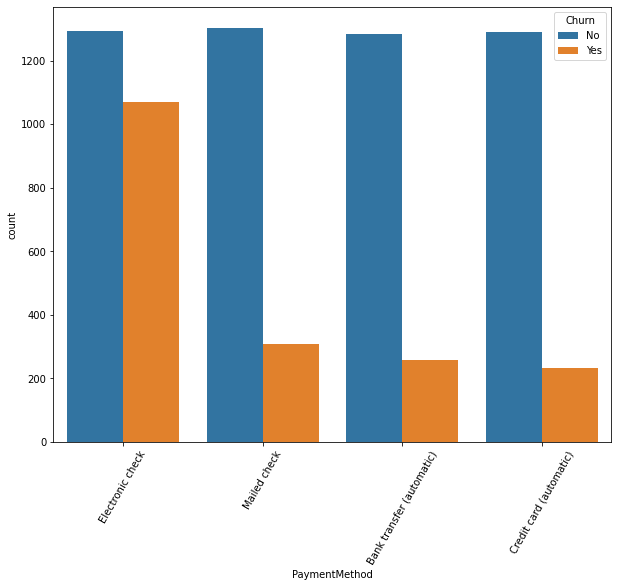

In [38]:
plt.figure(figsize=[10, 8])
sns.countplot(x = 'PaymentMethod' , hue = 'Churn', data = data);
plt.xticks(rotation = 60);

Dari visualisasi terlihat bahwa pelanggan yang beralih didominasi oleh pelanggan yang melakukan pembayaran melalui Elctronic check

### Melihat Cardinality Data

In [39]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature, len(data[feature].unique())))

The feature is customerID and number of categories are 7043
The feature is gender and number of categories are 2
The feature is Partner and number of categories are 2
The feature is Dependents and number of categories are 2
The feature is PhoneService and number of categories are 2
The feature is MultipleLines and number of categories are 3
The feature is InternetService and number of categories are 3
The feature is OnlineSecurity and number of categories are 3
The feature is OnlineBackup and number of categories are 3
The feature is DeviceProtection and number of categories are 3
The feature is TechSupport and number of categories are 3
The feature is StreamingTV and number of categories are 3
The feature is StreamingMovies and number of categories are 3
The feature is Contract and number of categories are 3
The feature is PaperlessBilling and number of categories are 2
The feature is PaymentMethod and number of categories are 4
The feature is Churn and number of categories are 2


### Melihat Outliers

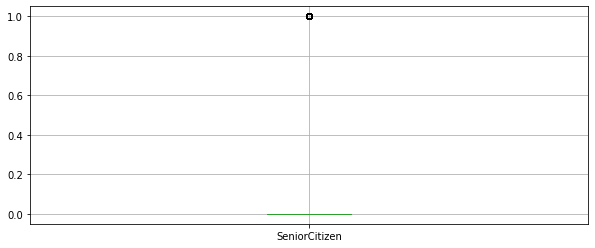

In [40]:
data[discrete_features].boxplot(figsize=(10,4));

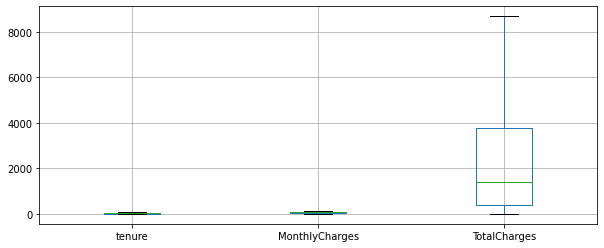

In [41]:
data[continous_features].boxplot(figsize=(10,4));

tidak terdapat outliers dalam data discrete yaitu pada features SeniorCitizen

## Exploratory Data Analysis

dari hasil visualisasi diperoleh informasi sebagai berikut:
* Dari Visualisasi terlihat bahwa pelanggan telekomunikasi yang beralih sebesar 26.5% dan yang tidak beralih 73.5%
* Dari visualisasi terlihat bahwa pelanggan dengan status Senior Citizen cenderung tidak beralih
* Dari Visualisasi telihat bahwa pelanggan yang beralih adalah pelanggan yang telah berlangganan dalam rentang waktu 0 sampai 20 bulan
* Dari Visualisasi telihat bahwa pelanggan yang beralih adalah pelanggan memiliki rentang tagihan pembayaran perbulan antara 70 sampai dengan 110
* Dari visualisasi terlihat bahwa gender pria dan wanita memiliki jumlah yang sama menjadi pelanggan yang beralih
* Dari visualisasi terlihat bahwa pelanggan yang beralih adalah didominasi oleh pelanggan yang belum memiliki partners
* Dari visualisasi terlihat bahwa pelanggan yang beralih didominasi oleh pelanggan yang belum memiliki tanggungan (dependents)
* Dari visualisasi terlihat bahwa pelanggan yang beralih didominasi oleh pelanggan yang telah memiliki layanan telephone
* Dari visualisasi terlihat bahwa pelanggan yang beralih memiliki persentase yang sama banyak antara pelanggan yang miliki lines telepone banyak dan tidak memiliki line telephone banyak 
* Dari visualisasi terlihat bahwa pelanggan yang beralih didominasi oleh pelanggan yang memliki layanan internet service fiber optic
* Dari visualisasi terlihat bahwa pelanggan yang beralih didominasi oleh pelanggan yang tidak memiliki online security
* Dari visualisasi terlihat bahwa pelanggan yang beralih didominasi oleh pelanggan yang tidak memiliki device protection
* Dari visualisasi terlihat bahwa pelanggan yang beralih didominasi oleh pelanggan yang tidak memiliki layanan StreamingTV
* Dari visualisasi terlihat bahwa pelanggan yang beralih didominasi oleh pelanggan yang memiliki contract month to month
* Dari visualisasi terlihat bahwa pelanggan yang beralih didominasi oleh pelanggan yang mendapatkan tagihan berupa kertas
* Dari visualisasi terlihat bahwa pelanggan yang beralih didominasi oleh pelanggan yang melakukan pembayaran melalui Elctronic check

# Features Engineering

#### Membagi data terlebih dahulu sebelum menerapkan Rekayasa Fitur (Feature Engineering)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(data, data['Churn'],test_size=0.1,random_state=0)

In [43]:
X_train.shape

(6338, 21)

untuk menghindari adanya kemungkinan kebocoran data sehingga kita perlu membagi data terlebih dahulu dan kemudian menerapkan fitur engineering

#### Mempersiapkan data untuk dilakukan feature engineering

In [44]:
df = X_train

menggunakan data training untuk dilakukan fitur engineering

#### Melihat data

In [45]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3637,4083-EUGRJ,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.25,178.50,Yes
6042,4750-UKWJK,Female,1,Yes,No,37,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.60,727.80,No
1824,0794-YVSGE,Male,0,Yes,Yes,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),20.30,1401.15,No
4121,0576-WNXXC,Male,1,Yes,No,27,Yes,Yes,Fiber optic,No,Yes,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,95.55,2510.20,Yes
1425,7077-XJMET,Male,0,Yes,No,12,Yes,No,DSL,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,74.15,741.40,No


## Menghapus Feature

In [46]:
df = df.drop('customerID',axis=1)

melalukan drop untuk fitur 'customerID' karena tidak berpengaruh dalam proses training model 

#### Melihat Columns Data

In [47]:
for col in df.columns:
    print(col, df[col].unique()[0:30], "\n")

gender ['Male' 'Female'] 

SeniorCitizen [0 1] 

Partner ['No' 'Yes'] 

Dependents ['No' 'Yes'] 

tenure [ 9 37 72 27 12  4 51 29 17  1 50  2  8 68 66 54 18 47 69 64 35 23 45 25
 30  6 16 61 63 52] 

PhoneService ['Yes' 'No'] 

MultipleLines ['No' 'Yes' 'No phone service'] 

InternetService ['No' 'Fiber optic' 'DSL'] 

OnlineSecurity ['No internet service' 'No' 'Yes'] 

OnlineBackup ['No internet service' 'Yes' 'No'] 

DeviceProtection ['No internet service' 'Yes' 'No'] 

TechSupport ['No internet service' 'No' 'Yes'] 

StreamingTV ['No internet service' 'No' 'Yes'] 

StreamingMovies ['No internet service' 'Yes' 'No'] 

Contract ['Month-to-month' 'One year' 'Two year'] 

PaperlessBilling ['No' 'Yes'] 

PaymentMethod ['Mailed check' 'Bank transfer (automatic)' 'Electronic check'
 'Credit card (automatic)'] 

MonthlyCharges [ 20.25  19.6   20.3   95.55  74.15  70.65  86.35  75.35  64.7   19.9
 103.7   54.85  90.25  19.4   25.8  105.2   89.8   25.65  56.8   88.7
  64.75  19.65  98.35  75.

## Missing Values

#### Numerical Features

In [48]:
numerical_nan = [feature for feature in df.columns if df[feature].isnull().sum()>1 and df[feature].dtypes!='O' ]

for feature in numerical_nan:
    print('{}: {} % missing values'.format(feature, np.round(df[feature].isnull().mean(),4)))

tidak terdapat missing values dalam numerical features

#### Categorical Features

In [49]:
categories_nan = [feature for feature in df.columns if df[feature].isnull().sum()>1 and df[feature].dtypes=='O']

for feature in categories_nan:
    print('{} : {} % missing values'.format(feature, np.round(df[feature].isnull().mean(),4)))

tidak terdapat missing values dalam categorical features

## Mengubah Categorical values menjadi Numerical values

In [50]:
categorical_features = [feature for feature in df.columns if df[feature].dtypes=='O']

#### Mengubah kategorikal features Churn menjadi numerical features

In [51]:
churn_mapping = { k: i for i, k in enumerate(df['Churn'].unique(), 0)}
df['Churn'] = df['Churn'].map(churn_mapping)

In [52]:
for feature in categorical_features:
    labels_ordered = df.groupby([feature])['Churn'].mean().sort_values().index
    labels_ordered = {k:i for i,k in enumerate(labels_ordered,0)}
    df[feature] = df[feature].map(labels_ordered)

In [53]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3637,1,0,0,0,9,0,1,2,2,2,2,2,2,2,0,1,1,20.25,178.50,0
6042,0,1,1,0,37,0,1,2,2,2,2,2,2,2,1,1,1,19.60,727.80,1
1824,1,0,1,1,72,0,1,2,2,2,2,2,2,2,2,1,2,20.30,1401.15,1
4121,1,1,1,0,27,0,0,0,0,1,1,0,0,1,0,0,0,95.55,2510.20,0
1425,1,0,1,0,12,0,1,1,0,0,1,1,1,1,0,0,0,74.15,741.40,1


#### Melihat Columns Data setelah dilakukan proses Features Engineering

In [54]:
for col in df.columns:
    print(col, df[col].unique(), '\n')

gender [1 0] 

SeniorCitizen [0 1] 

Partner [0 1] 

Dependents [0 1] 

tenure [ 9 37 72 27 12  4 51 29 17  1 50  2  8 68 66 54 18 47 69 64 35 23 45 25
 30  6 16 61 63 52 41 13  3 10 71  5 44 24 22 32 55 14 56 58 65 62 46 48
 33 11 19 38 53 67 21 59 70 40 42 49 39 26 43 15 28 60 34 36 31 57  7 20
  0] 

PhoneService [0 1] 

MultipleLines [1 0 2] 

InternetService [2 0 1] 

OnlineSecurity [2 0 1] 

OnlineBackup [2 1 0] 

DeviceProtection [2 1 0] 

TechSupport [2 0 1] 

StreamingTV [2 0 1] 

StreamingMovies [2 1 0] 

Contract [0 1 2] 

PaperlessBilling [1 0] 

PaymentMethod [1 2 0 3] 

MonthlyCharges [20.25 19.6  20.3  ... 23.8  58.45 23.65] 

TotalCharges [ 178.5   727.8  1401.15 ...  964.35 1185.95   94.5 ] 

Churn [0 1] 



## Feature Selection

In [55]:
X_train = df.drop(['Churn'],axis=1)
y_train = df[['Churn']]

In [56]:
feature_sel_model = RandomForestClassifier(random_state=42) 
feature_sel_model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

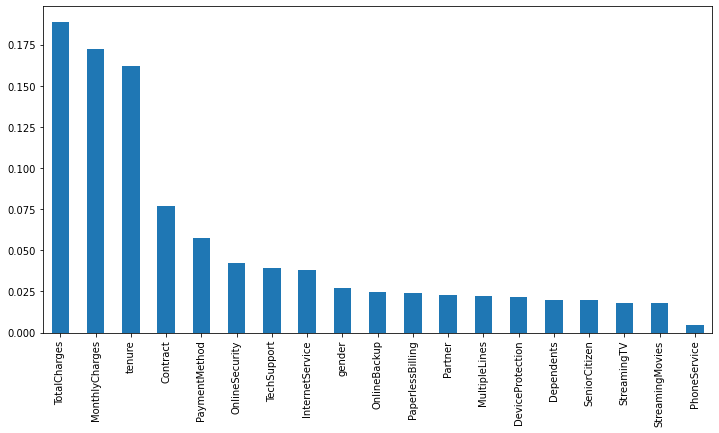

In [57]:
importance = pd.Series(feature_sel_model.feature_importances_)
importance.index = df.drop('Churn', axis=1).columns
importance.sort_values(inplace=True, ascending=False)
importance.plot.bar(figsize=(12,6));

In [58]:
features_importance = importance[0:19]

print("Features Importance:")
print(features_importance)
print("\n")
print("Persentase Features Importance:")
print(np.round(features_importance.sum(),2))
print("\n")
print("Features Importance Index:")
print(features_importance.index )

Features Importance:
TotalCharges        0.188835
MonthlyCharges      0.172138
tenure              0.162013
Contract            0.077080
PaymentMethod       0.057641
OnlineSecurity      0.042548
TechSupport         0.039199
InternetService     0.037759
gender              0.027237
OnlineBackup        0.024365
PaperlessBilling    0.024276
Partner             0.022924
MultipleLines       0.022366
DeviceProtection    0.021791
Dependents          0.019926
SeniorCitizen       0.019917
StreamingTV         0.017864
StreamingMovies     0.017837
PhoneService        0.004286
dtype: float64


Persentase Features Importance:
1.0


Features Importance Index:
Index(['TotalCharges', 'MonthlyCharges', 'tenure', 'Contract', 'PaymentMethod',
       'OnlineSecurity', 'TechSupport', 'InternetService', 'gender',
       'OnlineBackup', 'PaperlessBilling', 'Partner', 'MultipleLines',
       'DeviceProtection', 'Dependents', 'SeniorCitizen', 'StreamingTV',
       'StreamingMovies', 'PhoneService'],
      dtyp

### Menentukan Features pilihan

In [59]:
col_to_use = ['tenure', 'PaymentMethod', 'Contract', 'TotalCharges', 'OnlineSecurity',
       'TechSupport', 'MonthlyCharges', 'gender', 'InternetService', 'Partner',
       'OnlineBackup', 'PaperlessBilling', 'MultipleLines', 'DeviceProtection',
       'SeniorCitizen', 'Dependents', 'StreamingTV', 'StreamingMovies', 'PhoneService', 'Churn']

In [60]:
dataset = df.copy()
dataset = df[col_to_use]
dataset.head()

,tenure,PaymentMethod,Contract,TotalCharges,OnlineSecurity,TechSupport,MonthlyCharges,gender,InternetService,Partner,OnlineBackup,PaperlessBilling,MultipleLines,DeviceProtection,SeniorCitizen,Dependents,StreamingTV,StreamingMovies,PhoneService,Churn
3637,9,1,0,178.50,2,2,20.25,1,2,0,2,1,1,2,0,0,2,2,0,0
6042,37,1,1,727.80,2,2,19.60,0,2,1,2,1,1,2,1,0,2,2,0,1
1824,72,2,2,1401.15,2,2,20.30,1,2,1,2,1,1,2,0,1,2,2,0,1
4121,27,0,0,2510.20,0,0,95.55,1,0,1,1,0,0,1,1,0,0,1,0,0
1425,12,0,0,741.40,0,1,74.15,1,1,1,0,0,1,1,0,0,1,1,0,1


In [61]:
dataset.columns

Index(['tenure', 'PaymentMethod', 'Contract', 'TotalCharges', 'OnlineSecurity',
       'TechSupport', 'MonthlyCharges', 'gender', 'InternetService', 'Partner',
       'OnlineBackup', 'PaperlessBilling', 'MultipleLines', 'DeviceProtection',
       'SeniorCitizen', 'Dependents', 'StreamingTV', 'StreamingMovies',
       'PhoneService', 'Churn'],
      dtype='object')

# Data Preprocessing

### Menentukan variable Bebas (X) dan Variabel Terikat (y) 

In [62]:
X = dataset.drop(['Churn'], axis=1)
y = dataset['Churn']

### Split data

In [63]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

In [64]:
X_train.shape

(4436, 19)

In [65]:
X_val.shape

(1902, 19)

### Scalling

In [66]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_trf = scaler.transform(X_train) 
X_val_trf = scaler.transform(X_val)

# Pipeline

### membangun pipeline

In [67]:
import os

In [68]:
# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "data"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [69]:
def save_to_multiple_csv_files(data, name_prefix, header=None, n_parts=10):
    churn_dir = os.path.join("datasets", "telco")
    os.makedirs(churn_dir, exist_ok=True)
    path_format = os.path.join(churn_dir, "my_{}_{:02d}.csv")

    filepaths = []
    m = len(data)
    for file_idx, row_indices in enumerate(np.array_split(np.arange(m), n_parts)):
        part_csv = path_format.format(name_prefix, file_idx)
        filepaths.append(part_csv)
        with open(part_csv, "wt", encoding="utf-8") as f:
            if header is not None:
                f.write(header)
                f.write("\n")
            for row_idx in row_indices:
                f.write(",".join([repr(col) for col in data[row_idx]]))
                f.write("\n")
    return filepaths

membagi dataset menjadi 20 CSV files dan melakukan penyimpanan

In [70]:
train_data = np.c_[X_train_trf, y_train]
valid_data = np.c_[X_val_trf, y_val]
header_cols = dataset.columns 
header = ",".join(header_cols)

In [71]:
train_filepaths = save_to_multiple_csv_files(train_data, "train", header, n_parts=20)
valid_filepaths = save_to_multiple_csv_files(valid_data, "valid", header, n_parts=10)

### train dataset

In [72]:
pd.read_csv(train_filepaths[0]).head()

,tenure,PaymentMethod,Contract,TotalCharges,OnlineSecurity,TechSupport,MonthlyCharges,gender,InternetService,Partner,OnlineBackup,PaperlessBilling,MultipleLines,DeviceProtection,SeniorCitizen,Dependents,StreamingTV,StreamingMovies,PhoneService,Churn
0,0.099621,1.464178,1.565390,-0.589708,1.591976,1.592129,-1.304150,-1.014533,1.560927,1.034873,1.558650,-0.842283,-1.044626,1.560164,-0.444186,1.535598,1.537274,1.536767,-0.32254,1.0
1,-0.308466,1.464178,1.565390,-0.703359,1.591976,1.592129,-1.325681,-1.014533,1.560927,-0.966302,1.558650,1.187249,-1.044626,1.560164,-0.444186,-0.651212,1.537274,1.536767,-0.32254,0.0
2,-1.165449,-0.279237,-0.832838,-0.929492,-0.914059,0.339214,-0.487655,0.985675,0.282206,1.034873,-1.003578,1.187249,0.517208,-0.998862,-0.444186,-0.651212,-1.081020,-1.083179,-0.32254,0.0
3,-0.104423,1.464178,1.565390,-0.085136,-0.914059,0.339214,0.143349,0.985675,0.282206,-0.966302,-1.003578,-0.842283,-1.044626,0.280651,2.251311,-0.651212,0.228127,-1.083179,-0.32254,1.0
4,1.242264,1.464178,0.366276,1.560577,-0.914059,-0.913702,0.850538,0.985675,-0.996514,-0.966302,0.277536,1.187249,-1.044626,-0.998862,-0.444186,-0.651212,-1.081020,0.226794,-0.32254,1.0


In [73]:
os.path.getsize(train_filepaths[0])

83294

In [74]:
import re
train_folder=('/').join(re.search('(.*)/(.*)/(.*)',train_filepaths[0], re.IGNORECASE).group(1,2))

In [75]:
print(train_filepaths[0])
train_folder

datasets/telco/my_train_00.csv


'datasets/telco'

In [76]:
full_csv = train_folder+'/full_train.csv'
with open(full_csv, "wt", encoding="utf-8") as f:
    if header is not None:
        f.write(header)
        f.write("\n")
    for row_idx in range(train_data.shape[0]):
        f.write(",".join([repr(col) for col in train_data[row_idx]]))
        f.write("\n")

In [77]:
os.path.getsize(full_csv)

1659799

In [78]:
pd.read_csv(full_csv).shape

(4436, 20)

In [79]:
train_data = pd.read_csv(full_csv)

In [80]:
train_data

,tenure,PaymentMethod,Contract,TotalCharges,OnlineSecurity,TechSupport,MonthlyCharges,gender,InternetService,Partner,OnlineBackup,PaperlessBilling,MultipleLines,DeviceProtection,SeniorCitizen,Dependents,StreamingTV,StreamingMovies,PhoneService,Churn
0,0.099621,1.464178,1.565390,-0.589708,1.591976,1.592129,-1.304150,-1.014533,1.560927,1.034873,1.558650,-0.842283,-1.044626,1.560164,-0.444186,1.535598,1.537274,1.536767,-0.32254,1.0
1,-0.308466,1.464178,1.565390,-0.703359,1.591976,1.592129,-1.325681,-1.014533,1.560927,-0.966302,1.558650,1.187249,-1.044626,1.560164,-0.444186,-0.651212,1.537274,1.536767,-0.32254,0.0
2,-1.165449,-0.279237,-0.832838,-0.929492,-0.914059,0.339214,-0.487655,0.985675,0.282206,1.034873,-1.003578,1.187249,0.517208,-0.998862,-0.444186,-0.651212,-1.081020,-1.083179,-0.32254,0.0
3,-0.104423,1.464178,1.565390,-0.085136,-0.914059,0.339214,0.143349,0.985675,0.282206,-0.966302,-1.003578,-0.842283,-1.044626,0.280651,2.251311,-0.651212,0.228127,-1.083179,-0.32254,1.0
4,1.242264,1.464178,0.366276,1.560577,-0.914059,-0.913702,0.850538,0.985675,-0.996514,-0.966302,0.277536,1.187249,-1.044626,-0.998862,-0.444186,-0.651212,-1.081020,0.226794,-0.32254,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4431,-1.287875,0.592470,-0.832838,-0.977938,-0.914059,-0.913702,0.156599,0.985675,-0.996514,-0.966302,-1.003578,-0.842283,0.517208,-0.998862,2.251311,-0.651212,-1.081020,-1.083179,-0.32254,0.0
4432,0.385282,-1.150945,-0.832838,0.761933,0.338959,-0.913702,0.981376,0.985675,-0.996514,1.034873,-1.003578,-0.842283,-1.044626,0.280651,-0.444186,-0.651212,-1.081020,0.226794,-0.32254,1.0
4433,0.548516,-0.279237,1.565390,1.033425,0.338959,0.339214,1.155274,-1.014533,-0.996514,1.034873,-1.003578,1.187249,-1.044626,0.280651,-0.444186,1.535598,-1.081020,0.226794,-0.32254,1.0
4434,0.385282,-1.150945,-0.832838,0.816377,-0.914059,0.339214,1.148650,0.985675,-0.996514,1.034873,0.277536,-0.842283,-1.044626,0.280651,-0.444186,-0.651212,-1.081020,0.226794,-0.32254,0.0


### valid dataset

In [81]:
pd.read_csv(valid_filepaths[0]).head()

,tenure,PaymentMethod,Contract,TotalCharges,OnlineSecurity,TechSupport,MonthlyCharges,gender,InternetService,Partner,OnlineBackup,PaperlessBilling,MultipleLines,DeviceProtection,SeniorCitizen,Dependents,StreamingTV,StreamingMovies,PhoneService,Churn
0,-1.247066,-1.150945,-0.832838,-0.969206,-0.914059,-0.913702,-0.678115,-1.014533,0.282206,-0.966302,-1.003578,-0.842283,0.517208,-0.998862,2.251311,-0.651212,-1.081020,-1.083179,-0.32254,1.0
1,-0.594127,1.464178,-0.832838,-0.541945,-0.914059,0.339214,-0.317068,0.985675,0.282206,-0.966302,-1.003578,1.187249,0.517208,0.280651,-0.444186,-0.651212,-1.081020,-1.083179,-0.32254,1.0
2,1.038221,-1.150945,-0.832838,1.540819,-0.914059,-0.913702,1.130432,0.985675,-0.996514,1.034873,0.277536,-0.842283,-1.044626,-0.998862,2.251311,-0.651212,0.228127,0.226794,-0.32254,1.0
3,-0.022805,1.464178,0.366276,0.498312,-0.914059,-0.913702,1.301018,-1.014533,-0.996514,-0.966302,0.277536,-0.842283,-1.044626,0.280651,-0.444186,-0.651212,0.228127,0.226794,-0.32254,1.0
4,1.038221,-0.279237,1.565390,-0.485561,1.591976,1.592129,-1.458175,0.985675,1.560927,1.034873,1.558650,1.187249,0.517208,1.560164,-0.444186,-0.651212,1.537274,1.536767,-0.32254,1.0


In [82]:
os.path.getsize(valid_filepaths[0])

71748

In [83]:
import re
valid_folder=('/').join(re.search('(.*)/(.*)/(.*)',valid_filepaths[0], re.IGNORECASE).group(1,2))

In [84]:
print(valid_filepaths[0])
valid_folder

datasets/telco/my_valid_00.csv


'datasets/telco'

In [85]:
full_csv = valid_folder+'/full_train.csv'
with open(full_csv, "wt", encoding="utf-8") as f:
    if header is not None:
        f.write(header)
        f.write("\n")
    for row_idx in range(valid_data.shape[0]):
        f.write(",".join([repr(col) for col in valid_data[row_idx]]))
        f.write("\n")

In [86]:
os.path.getsize(full_csv)

712121

In [87]:
pd.read_csv(full_csv).shape

(1902, 20)

In [88]:
valid_data = pd.read_csv(full_csv)

In [89]:
valid_data

,tenure,PaymentMethod,Contract,TotalCharges,OnlineSecurity,TechSupport,MonthlyCharges,gender,InternetService,Partner,OnlineBackup,PaperlessBilling,MultipleLines,DeviceProtection,SeniorCitizen,Dependents,StreamingTV,StreamingMovies,PhoneService,Churn
0,-1.247066,-1.150945,-0.832838,-0.969206,-0.914059,-0.913702,-0.678115,-1.014533,0.282206,-0.966302,-1.003578,-0.842283,0.517208,-0.998862,2.251311,-0.651212,-1.081020,-1.083179,-0.32254,1.0
1,-0.594127,1.464178,-0.832838,-0.541945,-0.914059,0.339214,-0.317068,0.985675,0.282206,-0.966302,-1.003578,1.187249,0.517208,0.280651,-0.444186,-0.651212,-1.081020,-1.083179,-0.32254,1.0
2,1.038221,-1.150945,-0.832838,1.540819,-0.914059,-0.913702,1.130432,0.985675,-0.996514,1.034873,0.277536,-0.842283,-1.044626,-0.998862,2.251311,-0.651212,0.228127,0.226794,-0.32254,1.0
3,-0.022805,1.464178,0.366276,0.498312,-0.914059,-0.913702,1.301018,-1.014533,-0.996514,-0.966302,0.277536,-0.842283,-1.044626,0.280651,-0.444186,-0.651212,0.228127,0.226794,-0.32254,1.0
4,1.038221,-0.279237,1.565390,-0.485561,1.591976,1.592129,-1.458175,0.985675,1.560927,1.034873,1.558650,1.187249,0.517208,1.560164,-0.444186,-0.651212,1.537274,1.536767,-0.32254,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1897,0.426090,-1.150945,0.366276,0.069376,-0.914059,0.339214,-0.308787,-1.014533,0.282206,-0.966302,0.277536,1.187249,0.517208,-0.998862,-0.444186,-0.651212,-1.081020,-1.083179,-0.32254,1.0
1898,1.609542,1.464178,1.565390,-0.400069,1.591976,1.592129,-1.492955,-1.014533,1.560927,1.034873,1.558650,1.187249,0.517208,1.560164,-0.444186,1.535598,1.537274,1.536767,-0.32254,1.0
1899,0.344473,1.464178,0.366276,0.033984,-0.914059,-0.913702,-0.280632,-1.014533,0.282206,-0.966302,0.277536,-0.842283,-1.044626,-0.998862,-0.444186,-0.651212,-1.081020,-1.083179,-0.32254,1.0
1900,0.589325,1.464178,0.366276,0.323933,0.338959,-0.913702,0.042323,-1.014533,0.282206,1.034873,-1.003578,-0.842283,0.517208,0.280651,-0.444186,-0.651212,0.228127,-1.083179,-0.32254,1.0


## Split X_train, y_train, X_val, y_val

In [90]:
X_train = train_data.drop(['Churn'], axis=1)
y_train = train_data['Churn']

In [91]:
X_val = valid_data.drop(['Churn'], axis=1)
y_val = valid_data['Churn']

In [92]:
X_train.shape

(4436, 19)

In [93]:
X_val.shape

(1902, 19)

# Pendefinisian dan Pelatihan Model

Membangun model Sequential pada data training dengan model yang berjalan dengan:
* menggunakan jumlah n_hidden sebanyak 2 
* jumlah neuron pada masing-masing hidden layers adalah 18 dan 10 
* activation function masing-masing hiden layer adalah 'relu' karena memiliki fungsi maks (x, 0) yang menetapkan semua nilai negatif dalam matriks x ke nol dan semua nilai lainnya dijaga konstan
* activation function pada output neuron adalah 'sigmoid' karena output yang diharapkan adalah binary classification dimana nilainya 0 atau 1
* menggunakan Dropout dengan noise_shape sebesar 0.5 dimana fungsi Dropout untuk proses mencegah terjadinya overfitting dan juga mempercepat proses learning
* alur model sequential: 18 --> 10 --> 1 output neuron

Dalam model compile:
* menggunakan optimizer adam karena menggabungkan sifat-sifat terbaik dari algoritma AdaGrad dan RMSProp untuk memberikan optimization algorithm yang dapat menangani sparse gradients pada noisy problem
* menggunakan loss function binary_crossenteropy karena model dibuat untuk untuk masalah klasifikasi biner.

EarlyStopping:

* digunakan untuk mencegah terjadinya overfitting model, dengan menetapkan jumlah epoch tanpa perbaikan setelah itu pelatihan akan dihentikan (Patience) sebesar 25

## Artificial Neural Network

In [94]:
model = keras.Sequential([                   
   keras.layers.Dense(18, input_shape=(19,), activation='relu'),
   keras.layers.Dropout(0.5),

   keras.layers.Dense(15, activation='relu'), 
   keras.layers.Dropout(0.5),

   keras.layers.Dense(10, activation='relu'), 
   keras.layers.Dropout(0.5),

   keras.layers.Dense(1, activation='sigmoid'),                          
])

model.compile(optimizer='adam', loss='binary_crossentropy')

In [95]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 18)                360       
_________________________________________________________________
dropout (Dropout)            (None, 18)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 15)                285       
_________________________________________________________________
dropout_1 (Dropout)          (None, 15)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                160       
_________________________________________________________________
dropout_2 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 1

In [96]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

In [97]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=200,
          validation_data=(X_val, y_val), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/200
139/139 [==============================] - 1s 3ms/step - loss: 0.7025 - val_loss: 0.5927
Epoch 2/200
139/139 [==============================] - 0s 2ms/step - loss: 0.5962 - val_loss: 0.5422
Epoch 3/200
139/139 [==============================] - 0s 2ms/step - loss: 0.5658 - val_loss: 0.5181
Epoch 4/200
139/139 [==============================] - 0s 2ms/step - loss: 0.5421 - val_loss: 0.5015
Epoch 5/200
139/139 [==============================] - 0s 2ms/step - loss: 0.5298 - val_loss: 0.4878
Epoch 6/200
139/139 [==============================] - 0s 2ms/step - loss: 0.5206 - val_loss: 0.4788
Epoch 7/200
139/139 [==============================] - 0s 2ms/step - loss: 0.5162 - val_loss: 0.4706
Epoch 8/200
139/139 [==============================] - 0s 2ms/step - loss: 0.5106 - val_loss: 0.4632
Epoch 9/200
139/139 [==============================] - 0s 2ms/step - loss: 0.5068 - val_loss: 0.4559
Epoch 10/200
139/139 [==============================] - 0s 2ms/step - loss: 0.4983 - val_lo

In [98]:
model_loss = pd.DataFrame(model.history.history)

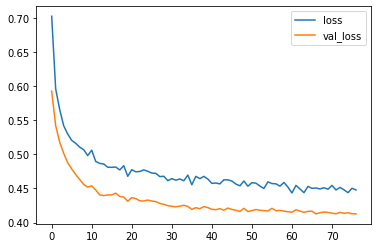

In [99]:
model_loss.plot();

In [100]:
prediction = model.predict(X_val)

In [101]:
y_pred = []
for element in prediction:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

### Model Evaluation

In [102]:
print(classification_report(y_val,y_pred))

              precision    recall  f1-score   support

         0.0       0.67      0.59      0.63       514
         1.0       0.86      0.89      0.87      1388

    accuracy                           0.81      1902
   macro avg       0.76      0.74      0.75      1902
weighted avg       0.81      0.81      0.81      1902



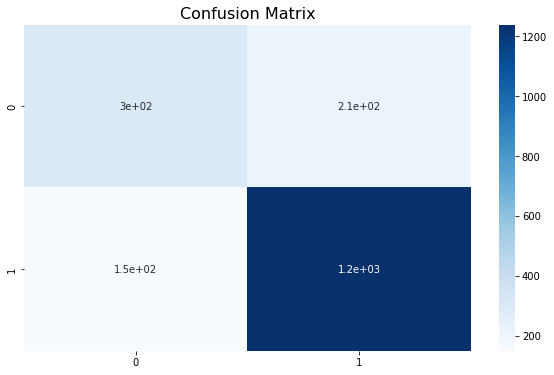

In [103]:
# Confusion Matrix Random Forest Classifier
ann_model = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(10, 6))
plt.title("Confusion Matrix", size=16)
sns.heatmap(ann_model, annot=True, cmap="Blues");


ROC Curve : 


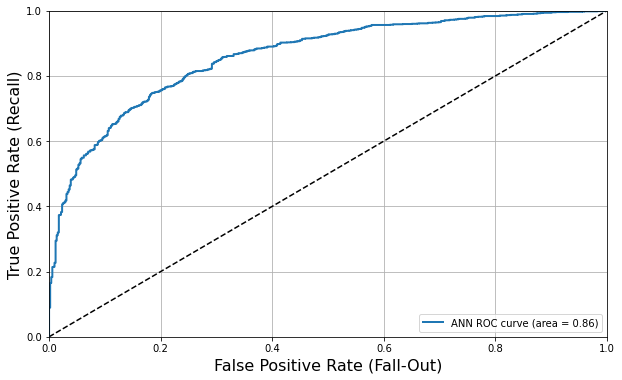

In [104]:
# ROC Curve
print("ROC Curve : ")
plt.figure(figsize=(10, 6))                                    
plt.axis([0, 1, 0, 1])                                    
plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
plt.ylabel('True Positive Rate (Recall)', fontsize=16)    
plt.grid(True)                                            
plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
labels=['ANN']
for idx,model in enumerate([model]):
    y_scores = model.predict(X_val)
    fpr, tpr, thresholds = roc_curve(y_val, y_scores)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, linewidth=2,label=labels[idx] + ' ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc="lower right");

## Model Evaluation Artificial Neural Network

dari hasil evaluasi model Artificial Neural Network diperoleh hasil **f1-score** sebesar **0.87** dan **ROC Curve sebesar 0.86** 

# Model Improvement

In [105]:
def build_model(n_hidden=2, n_neurons=18, input_shape=[19]):
    model = keras.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=["accuracy"])
    return model

In [106]:
keras_cls = keras.wrappers.scikit_learn.KerasClassifier(build_model)

In [107]:
keras_cls.fit(X_train, y_train, epochs=200,
              validation_data=(X_val, y_val),
              callbacks=[keras.callbacks.EarlyStopping(patience=25)])

Epoch 1/200
139/139 [==============================] - 1s 3ms/step - loss: 2.2300 - accuracy: 0.5859 - val_loss: 1.3247 - val_accuracy: 0.6709
Epoch 2/200
139/139 [==============================] - 0s 2ms/step - loss: 1.1826 - accuracy: 0.6646 - val_loss: 0.9568 - val_accuracy: 0.6819
Epoch 3/200
139/139 [==============================] - 0s 2ms/step - loss: 0.9667 - accuracy: 0.7045 - val_loss: 0.8301 - val_accuracy: 0.7219
Epoch 4/200
139/139 [==============================] - 0s 2ms/step - loss: 0.8040 - accuracy: 0.7193 - val_loss: 0.7758 - val_accuracy: 0.7266
Epoch 5/200
139/139 [==============================] - 0s 2ms/step - loss: 0.7530 - accuracy: 0.7277 - val_loss: 0.7021 - val_accuracy: 0.7213
Epoch 6/200
139/139 [==============================] - 0s 2ms/step - loss: 0.6948 - accuracy: 0.7250 - val_loss: 0.6719 - val_accuracy: 0.7119
Epoch 7/200
139/139 [==============================] - 0s 2ms/step - loss: 0.6640 - accuracy: 0.7205 - val_loss: 0.6607 - val_accuracy: 0.7329

In [108]:
param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": [1, 10, 18]
}

In [109]:
rnd_search_cv = RandomizedSearchCV(keras_cls, param_distribs, n_iter=2, cv=2, verbose=2)

In [110]:
rnd_search_cv.fit(X_train, y_train, epochs=200,
                  validation_data=(X_val, y_val),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Fitting 2 folds for each of 2 candidates, totalling 4 fits
[CV] n_neurons=18, n_hidden=3 ........................................
Epoch 1/200


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


70/70 [==============================] - 1s 5ms/step - loss: 1.4438 - accuracy: 0.4463 - val_loss: 0.9256 - val_accuracy: 0.5179
Epoch 2/200
70/70 [==============================] - 0s 3ms/step - loss: 0.8122 - accuracy: 0.5852 - val_loss: 0.8236 - val_accuracy: 0.6146
Epoch 3/200
70/70 [==============================] - 0s 3ms/step - loss: 0.7559 - accuracy: 0.6456 - val_loss: 0.7128 - val_accuracy: 0.6377
Epoch 4/200
70/70 [==============================] - 0s 3ms/step - loss: 0.6852 - accuracy: 0.6641 - val_loss: 0.7337 - val_accuracy: 0.6919
Epoch 5/200
70/70 [==============================] - 0s 3ms/step - loss: 0.6698 - accuracy: 0.7160 - val_loss: 0.6807 - val_accuracy: 0.7098
Epoch 6/200
70/70 [==============================] - 0s 3ms/step - loss: 0.6546 - accuracy: 0.7331 - val_loss: 0.6615 - val_accuracy: 0.7277
Epoch 7/200
70/70 [==============================] - 0s 3ms/step - loss: 0.6282 - accuracy: 0.7313 - val_loss: 0.6488 - val_accuracy: 0.7282
Epoch 8/200
70/70 [======

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.7s remaining:    0.0s


70/70 [==============================] - 1s 5ms/step - loss: 1.3760 - accuracy: 0.6411 - val_loss: 1.0032 - val_accuracy: 0.6893
Epoch 2/200
70/70 [==============================] - 0s 3ms/step - loss: 0.8964 - accuracy: 0.7146 - val_loss: 0.8954 - val_accuracy: 0.7145
Epoch 3/200
70/70 [==============================] - 0s 3ms/step - loss: 0.8093 - accuracy: 0.7376 - val_loss: 0.9075 - val_accuracy: 0.7687
Epoch 4/200
70/70 [==============================] - 0s 3ms/step - loss: 0.7782 - accuracy: 0.7714 - val_loss: 0.8626 - val_accuracy: 0.7702
Epoch 5/200
70/70 [==============================] - 0s 3ms/step - loss: 0.7289 - accuracy: 0.7705 - val_loss: 0.8666 - val_accuracy: 0.7834
Epoch 6/200
70/70 [==============================] - 0s 3ms/step - loss: 0.7075 - accuracy: 0.7836 - val_loss: 0.7870 - val_accuracy: 0.7787
Epoch 7/200
70/70 [==============================] - 0s 3ms/step - loss: 0.7540 - accuracy: 0.7403 - val_loss: 0.8916 - val_accuracy: 0.7050
Epoch 8/200
70/70 [======

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  1.7min finished


139/139 [==============================] - 1s 3ms/step - loss: 2.8044 - accuracy: 0.4004 - val_loss: 0.8197 - val_accuracy: 0.5962
Epoch 2/200
139/139 [==============================] - 0s 2ms/step - loss: 0.7663 - accuracy: 0.6914 - val_loss: 0.7497 - val_accuracy: 0.7350
Epoch 3/200
139/139 [==============================] - 0s 2ms/step - loss: 0.6986 - accuracy: 0.7331 - val_loss: 0.7173 - val_accuracy: 0.7392
Epoch 4/200
139/139 [==============================] - 0s 2ms/step - loss: 0.6869 - accuracy: 0.7505 - val_loss: 0.7188 - val_accuracy: 0.7692
Epoch 5/200
139/139 [==============================] - 0s 2ms/step - loss: 0.6844 - accuracy: 0.7665 - val_loss: 0.6183 - val_accuracy: 0.7455
Epoch 6/200
139/139 [==============================] - 0s 2ms/step - loss: 0.6174 - accuracy: 0.7189 - val_loss: 0.5787 - val_accuracy: 0.7366
Epoch 7/200
139/139 [==============================] - 0s 2ms/step - loss: 0.5753 - accuracy: 0.7595 - val_loss: 0.5696 - val_accuracy: 0.7687
Epoch 8/200

RandomizedSearchCV(cv=2, error_score=nan,
                   estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7fe22acff2d0>,
                   iid='deprecated', n_iter=2, n_jobs=None,
                   param_distributions={'n_hidden': [0, 1, 2, 3],
                                        'n_neurons': [1, 10, 18]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=2)

In [111]:
prediction = rnd_search_cv.predict(X_val)

In [112]:
y_pred = []
for element in prediction:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [113]:
print(classification_report(y_val,y_pred))

              precision    recall  f1-score   support

         0.0       0.68      0.54      0.60       514
         1.0       0.84      0.90      0.87      1388

    accuracy                           0.81      1902
   macro avg       0.76      0.72      0.74      1902
weighted avg       0.80      0.81      0.80      1902



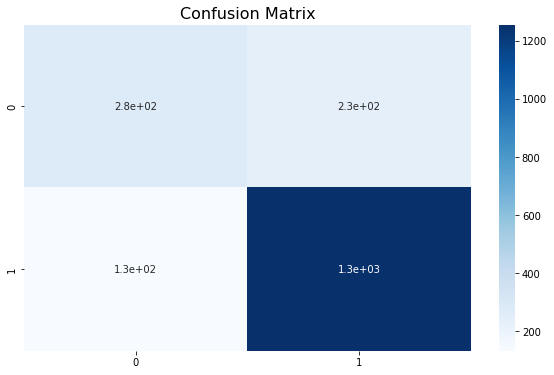

In [114]:
# Confusion Matrix Random Forest Classifier
rnd_search_model = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(10, 6))
plt.title("Confusion Matrix", size=16)
sns.heatmap(rnd_search_model, annot=True, cmap="Blues");

ROC Curve : 


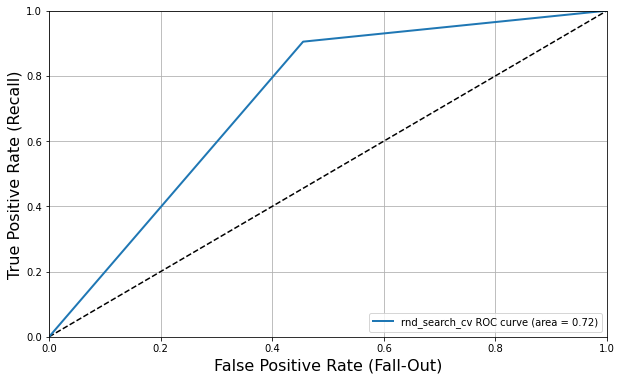

In [115]:
# ROC Curve
print("ROC Curve : ")
plt.figure(figsize=(10, 6))                                    
plt.axis([0, 1, 0, 1])                                    
plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
plt.ylabel('True Positive Rate (Recall)', fontsize=16)    
plt.grid(True)                                            
plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
labels=['rnd_search_cv']
for idx,model in enumerate([model]):
    y_scores = rnd_search_cv.predict(X_val)
    fpr, tpr, thresholds = roc_curve(y_val, y_scores)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, linewidth=2,label=labels[idx] + ' ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc="lower right");

### Analysis Model Improvement

dari hasil model improvement dengan menggunakan RandomizedSearchCV dengan parameter sebagai berikut:
    
* "n_hidden": [0, 1, 2, 3],
* "n_neurons": [1, 10, 18]

didapatkan nilai evaluasi performa sebagai berikut:

* menghasilkan score f1-score sebesar 0.84
* menghasilkan ROC score sebesar 0.72

# Model Inference

#### Membuat data baru

In [116]:
values_1 = [ 0.099621, 1.464178, 1.565390, -0.589708, 1.591976, 1.592129, -1.304150, -1.014533, 1.560927,  1.034873, 1.558650, -0.842283, -1.044626, 1.560164, -0.444186,  1.535598, 1.537274, 1.536767, -0.32254]
values_2 = [-0.308466, 1.464178, 1.565390, -0.703359, 1.591976, 1.592129, -1.325681, -1.014533, 1.560927, -0.966302, 1.558650,  1.187249, -1.044626, 1.560164, -0.444186, -0.651212, 1.537274, 1.536767, -0.32254]

In [117]:
values = [ values_1, values_2]

In [118]:
data_dummies = pd.DataFrame(values, columns=['tenure', 'PaymentMethod', 'Contract', 'TotalCharges', 'OnlineSecurity',
       'TechSupport', 'MonthlyCharges', 'gender', 'InternetService', 'Partner',
       'OnlineBackup', 'PaperlessBilling', 'MultipleLines', 'DeviceProtection',
       'SeniorCitizen', 'Dependents', 'StreamingTV', 'StreamingMovies', 'PhoneService'])

#### Melihat data baru

In [119]:
data_dummies

,tenure,PaymentMethod,Contract,TotalCharges,OnlineSecurity,TechSupport,MonthlyCharges,gender,InternetService,Partner,OnlineBackup,PaperlessBilling,MultipleLines,DeviceProtection,SeniorCitizen,Dependents,StreamingTV,StreamingMovies,PhoneService
0,0.099621,1.464178,1.56539,-0.589708,1.591976,1.592129,-1.304150,-1.014533,1.560927,1.034873,1.55865,-0.842283,-1.044626,1.560164,-0.444186,1.535598,1.537274,1.536767,-0.32254
1,-0.308466,1.464178,1.56539,-0.703359,1.591976,1.592129,-1.325681,-1.014533,1.560927,-0.966302,1.55865,1.187249,-1.044626,1.560164,-0.444186,-0.651212,1.537274,1.536767,-0.32254


#### Melakukan prediksi dengan data baru

In [120]:
predictions = model.predict(data_dummies)

for element in predictions:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)


print("Hasil Klasifikasi model Neural Network: \n")

if y_pred[0] == 0:
  print("Pelanggan 1 memiliki peluang untuk bertahan dengan provider")
else:
  print("pelanggan 1 memiliki peluang untuk berpindah dari provider")

if y_pred[1] == 0:
  print("Pelanggan 2 memiliki peluang untuk bertahan dengan provider")
else:
  print("pelanggan 2 memiliki peluang untuk berpindah dari provider")

Hasil Klasifikasi model Neural Network: 

Pelanggan 1 memiliki peluang untuk bertahan dengan provider
pelanggan 2 memiliki peluang untuk berpindah dari provider


### Analysis Model Inference

dari hasil mencoba data baru untuk melakukan prediksi menggunakan model Artificial Neural Network ditarik informasi sebagai berikut:

* dari hasil percobaan dapat diperoleh informasi bahwa feature tenure, MonthlyCharges, TotalCharges, Partner, PaperlessBilling dan Dependents memiliki pengaruh terhadap peluang pelanggan untuk bertahan atau berganti provider telco

# Model Analysis

Berdasarkan hasil analysis dengan menggunakan model inferent dan Explorasi Data Analysis terdapat beberapa informasi yang bisa dijadikan pertimbangan oleh perusahaan untuk dapat mencegah konsumen agar tidak berpindah provider, informasi tersebut adalah:

#### Feature tenure
* Dari Visualisasi telihat bahwa pelanggan yang beralih adalah pelanggan yang telah berlangganan dalam rentang waktu 0 sampai 20 bulan
* Dari informasi tersebut perusahaan bisa lebih memperhatikan pelanggan dengan rentang waktu berlangganan antara 0 sampai 20 bulan


#### Feature MonthlyCharges
* Dari Visualisasi telihat bahwa pelanggan yang beralih adalah pelanggan memiliki rentang tagihan pembayaran perbulan antara 70 sampai dengan 110
* Dari informasi tersebut perusahaan bisa lebih memperhatikan pelanggan dengan rentang tagihan pembayaran perbulan antara 70 sampai dengan 110

#### Feature  TotalCharges
* Dari visualisasi terlihat bahwa pelanggan yang beralih adalah yang memiliki beban total tagihan dalam rentang 0 sampai 2000 
* Dari informasi tersebut perusahaan bisa lebih memperhatikan pelanggan dengan rentang beban total tagihan antara 0 sampai 2000


#### Feature Partner
* Dari visualisasi terlihat bahwa pelanggan yang beralih adalah didominasi oleh pelanggan yang belum memiliki partners
* Dari informasi tersebut perusahaan bisa lebih memperhatikan pelanggan yang belum memiliki partners

#### Feature PaperlessBilling
* Dari visualisasi terlihat bahwa pelanggan yang beralih didominasi oleh pelanggan yang mendapatkan tagihan berupa kertas (PaperlessBilling)
* Dari informasi tersebut perusahaan bisa lebih memperhatikan pelanggan yang mendapatkan tagihan berupa kertas (PaperlessBilling)

#### Feature Dependents
* Dari visualisasi terlihat bahwa pelanggan yang beralih didominasi oleh pelanggan yang belum memiliki tanggungan (dependents)
* Dari informasi tersebut perusahaan bisa lebih memperhatikan pelanggan yang belum memiliki tanggungan (dependents)
